<a href="https://colab.research.google.com/github/mlacasa/Regression/blob/main/RegressionNoLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lazypredict

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 991.0 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.3 MB 1.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.3 MB 2.4 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 3.3 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.2 MB

   ---------------------------------------- 99.7/99.7 MB 4.5 MB/s eta 0:00:00


In [2]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split



# Cargamos los datos para evaluar el coeficiente de Correlación

In [18]:
## creamos los datos

Xmetros = np.arange(0,5,0.01)
Pendiente = 2.5


Yprecio = []
for num in Xmetros:
  Yprecio.append(math.sin(num))
Yprecio1 = []
for num in Xmetros:
  Yprecio1.append(math.sin(num) + np.random.uniform(-0.1,0.1)+1)

Yprecio2 = []
for num in Xmetros:
  Yprecio2.append(math.sin(num) + np.random.normal(-0.1,0.1)+1)

trace0 = go.Scatter(x = Xmetros, y = Yprecio , mode = 'markers', name= '0.5x')
trace1 = go.Scatter(x = Xmetros, y = Yprecio1 , mode = 'markers', name= '0.5x+uniform')
trace2 = go.Scatter(x = Xmetros, y = Yprecio2 , mode = 'markers', name= '0.5x+normal')

data = [trace0, trace1, trace2]

layout = go.Layout(title='Ejemplo Datos Alta correlación')
fig = go.Figure(data = data, layout = layout )
#pyo.plot(fig)
fig.show()

In [19]:
np.corrcoef(Xmetros, Yprecio)

array([[ 1.        , -0.80929342],
       [-0.80929342,  1.        ]])

In [20]:
np.corrcoef(Xmetros, Yprecio1)

array([[ 1.        , -0.81012213],
       [-0.81012213,  1.        ]])

In [21]:
np.corrcoef(Xmetros, Yprecio2)

array([[ 1.        , -0.80329763],
       [-0.80329763,  1.        ]])

In [22]:
import statsmodels.api as sm                # Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf       # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R

df = pd.DataFrame(list(zip(Xmetros, Yprecio, Yprecio1, Yprecio2)), columns= ['metros', 'sinRuido', 'uniform', 'Normal'])

In [23]:
df.head()

,metros,sinRuido,uniform,Normal
0,0.00,0.00,0.98,0.94
1,0.01,0.01,1.08,0.78
2,0.02,0.02,1.11,1.23
3,0.03,0.03,1.00,0.99
4,0.04,0.04,1.00,0.79


In [9]:
X = sm.add_constant(df['metros']) # Añado la variable X
y = df['sinRuido']

In [10]:
mod = sm.OLS(y, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               sinRuido   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     945.3
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          3.76e-117
Time:                        17:32:31   Log-Likelihood:                -272.89
No. Observations:                 500   AIC:                             549.8
Df Residuals:                     498   BIC:                             558.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1388      0.037     30.472      0.0

In [11]:
y1 = df['uniform']

mod = sm.OLS(y1, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())



                            OLS Regression Results                            
Dep. Variable:                uniform   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     917.5
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          4.82e-115
Time:                        17:32:31   Log-Likelihood:                -279.22
No. Observations:                 500   AIC:                             562.4
Df Residuals:                     498   BIC:                             570.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1338      0.038     56.377      0.0

In [12]:
y2 = df['Normal']

mod = sm.OLS(y2, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Normal   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     906.2
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          3.52e-114
Time:                        17:32:31   Log-Likelihood:                -286.20
No. Observations:                 500   AIC:                             576.4
Df Residuals:                     498   BIC:                             584.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0496      0.038     53.402      0.0

# Buscamos otros modelos

In [13]:
from lazypredict.Supervised import LazyRegressor

X_train, X_test, y_train, y_test = train_test_split(Xmetros, Yprecio2, test_size=0.25, random_state=12)

In [14]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 17.21it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 62%|██████████████████████████████████████████████████▊                               | 26/42 [00:01<00:00, 16.32it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(375, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 11.62it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 375, number of used features: 1
[LightGBM] [Info] Start training from score 1.058487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [16]:
# with new parameters
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
# with default parameters
gbr = GradientBoostingRegressor()
 
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

MSE: 0.01


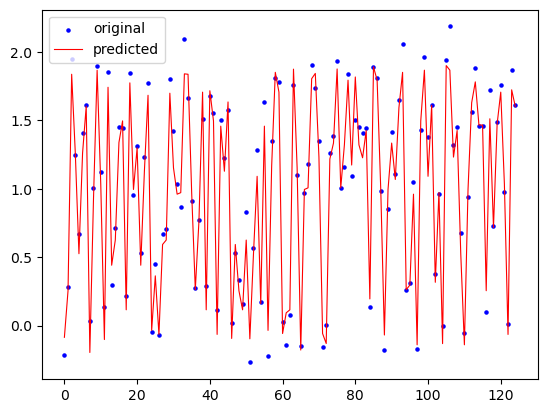

In [17]:
import matplotlib.pyplot as plt


ypred = gbr.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()